In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier#
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [94]:
from google.colab import files
uploaded=files.upload()

Saving Zoo.csv to Zoo (4).csv


In [95]:
data=pd.read_csv('Zoo.csv')
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [96]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [98]:
data.shape

(101, 18)

In [99]:
data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [100]:
data.type.value_counts()     #unbalanced


1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [101]:
data=data.drop(columns=['animal name'])
data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


<Axes: >

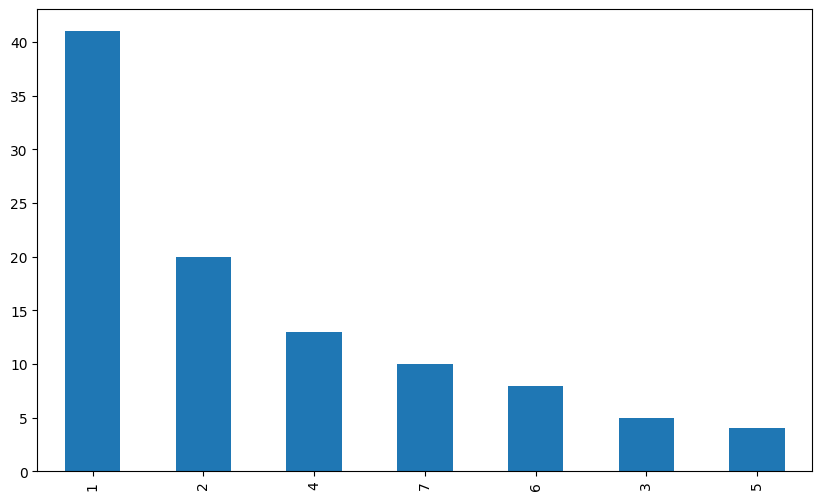

In [102]:
plt.figure(figsize=(10,6))
data.type.value_counts().plot(kind="bar") #target variable is multiclass

In [103]:
x=data.iloc[:,:16]
y=data.iloc[:,16]

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=15)

In [105]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [106]:
x_train_scaled

array([[ 1.        , -0.38411064, -1.        , ...,  0.58834841,
         2.78388218,  1.        ],
       [-1.        , -0.38411064,  1.        , ...,  0.58834841,
        -0.3592106 ,  1.        ],
       [ 1.        , -0.38411064, -1.        , ...,  0.58834841,
        -0.3592106 , -1.        ],
       ...,
       [ 1.        , -0.38411064, -1.        , ...,  0.58834841,
        -0.3592106 ,  1.        ],
       [-1.        , -0.38411064,  1.        , ...,  0.58834841,
        -0.3592106 , -1.        ],
       [-1.        , -0.38411064, -1.        , ...,  0.58834841,
        -0.3592106 , -1.        ]])

In [107]:
x_train_scaled.shape

(70, 16)

In [108]:
x_test_scaled.shape

(31, 16)

In [109]:
y_train.shape

(70,)

In [110]:
y_test.shape

(31,)

#model

In [111]:
model=KNeighborsClassifier(n_neighbors=4)
model.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=4)

In [112]:
pred=model.predict(x_test_scaled)

In [113]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.78      1.00      0.88         7
           2       1.00      1.00      1.00        11
           3       0.00      0.00      0.00         1
           4       1.00      0.80      0.89         5
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.90        31
   macro avg       0.83      0.76      0.78        31
weighted avg       0.92      0.90      0.90        31



In [114]:
f1 = f1_score(y_test,pred, average='weighted')

In [115]:
f1   #highest value for f1

0.9000896057347669

In [116]:
#f1score

r=[]
for k in range(1,40,2):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_scaled, y_train)
    pred=model.predict(x_test_scaled)
    r.append(f1_score(y_test,pred, average='weighted'))


In [117]:
r

[0.9444444444444443,
 0.918010752688172,
 0.8633776091081594,
 0.8311195445920304,
 0.8633776091081594,
 0.8633776091081594,
 0.8633776091081594,
 0.8361495135688685,
 0.8089848276605492,
 0.8089848276605492,
 0.38799861255636486,
 0.18709677419354842,
 0.13870967741935486,
 0.0878136200716846,
 0.0878136200716846,
 0.0831918505942275,
 0.0831918505942275,
 0.0831918505942275,
 0.0831918505942275,
 0.0831918505942275]

Text(0.5, 1.0, 'K-value VS f1-score')

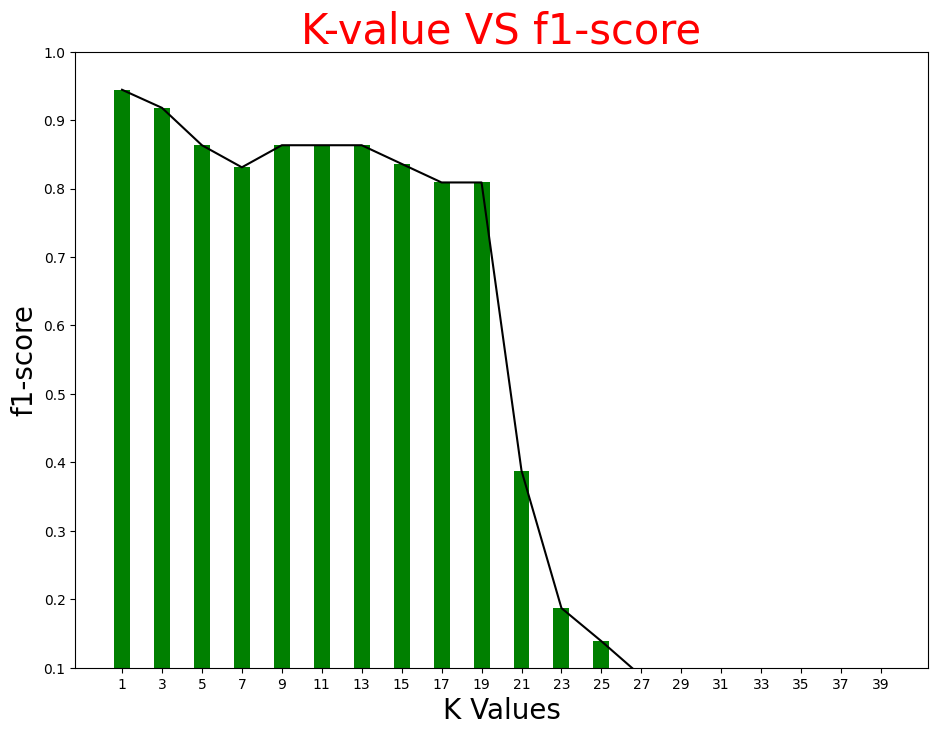

In [118]:
plt.figure(figsize=(11,8))
plt.bar(range(1,40,2),r,color='green')
plt.plot(range(1,40,2),r,color='black')
plt.ylim(0.1,1)
plt.xticks(range(1,40,2))
plt.xlabel("K Values",size=20)
plt.ylabel("f1-score",size=20)
plt.title("K-value VS f1-score",color='red',size=30)